## Lecture 5: Linear Regression Class Notes

Not all problems are classification problems. When one wants to predict a continous target variable from a set of features, then the problem is that of regression and not classification. see the tab called **One Feature** in the excel workbook called **Numerical Examples**.

**1. Regression Problem**

Here the variable we want to predict is continous in nature rather than being a categorical variable 

The model is $X_t\theta_1+\theta_0$

**2. Model Meaning**

But what does this model mean. Lets explore the tab **Model Meaning**. The model in this case means the parameter values that will enable us to make predictions which are as close to actual values as possible.

**3. Parameter Estimation: Cost function**

To estimate the value of $\theta_0$ and $\theta_1$, we will need to pose this problem as an optimization problem where we should choose those parameter values which minmize the error between actual and predicted values.

The error for a single row is defined as $$(\hat{y_i}-y_i)^2$$ The error for all rows is defined as $$\frac{1}{2n}\sum_{0}^{n}(\hat{y_i}-y_i)^2$$

These equations have been summarised in the tab **Cost Function** of the **Numerical Examples** workbook

**4. Estimating model parameters: Gradient Descent**

Once we are okay with the intuition behind the parameter estimation, we can focus on the specific methods by which the parameters can be estimated. One way to estimate parameters is to use Gradient Descent. The basic update equation for gradient descent is as follows:

$\theta_{new} := \theta_{old}-\eta*grad$

Refer to the **Gradient Descent Recall** tab in the workbook, for a simple recall of gradient descent.

**Class Excecise**
Write python code to minimise $\theta^2-2\theta$ using gradient descent. Assume that the initial value of $\theta = -1$, $\eta=0.01$. Run your iterations 400 times and then print out the values of updated $\theta$, function's value and value of gradient


In [1]:
def func(x):
    return x**2-2*x
def grad(x):
    return 2*x-2

In [2]:
x_old = -1
eta = 0.01
for i in range(400):
    x_new = x_old - eta*grad(x_old)
    func_value = func(x_new)
    grad_value = grad(x_new)
    x_old = x_new
print(func_value,grad_value,x_new)

-0.9999996172452885 -0.0012373434632233504 0.9993813282683883


**5. Gradient Descent on two parameter linear regression model**

Now we can explore the idea of gradient descent in the context of linear regression model of the form $\frac{1}{2n}\sum(y_i-(\theta_0+\theta_1x_i))^2$

**a. Now $grad(\theta_0)$ for one term will be: (MIT Lectures ignore this term in videos and assume that $\theta_0=0$)**

$\frac{-1}{n}(y_i-(\theta_0+\theta_1x_i)) = \frac{-1}{n}(E_i)$

And $grad(\theta_0)$ for all terms will be:

$\frac{-1}{n}\sum(E_i)$

**b. $grad(\theta_1)$ for one term will be:**

$\frac{-1}{n}(y_i-(\theta_0+\theta_1x_i))x_i = \frac{-1}{n}E_ix_i$

And $grad(\theta_1)$ for all terms will be:

$\frac{-1}{n}\sum(E_ix_i)$

You can refer to detailed calculations on a numerical example in the sheet **Grad Descent Linear Regression**

**Class Excercise: Use the data in sheet "One Feature" and estimate a model using gradient descent**


In [3]:
import pandas as pd
import numpy as np
data = pd.read_excel("Numerical Examples.xlsx",sheet_name = "One Feature")

In [4]:
x,y = data['x'],data['y']

In [5]:
theta_0_old = 10
theta_1_old = 40
eta = 0.01
iters = 200
for i in range(iters):
    preds = theta_0_old+theta_1_old*x
    errors = y-preds
    grad_theta_0 = (-1.0/preds.shape[0])*errors.sum()
    grad_theta_1 = (-1.0/preds.shape[0])*(errors*x).sum()
    theta_0_new = theta_0_old-eta*grad_theta_0
    theta_1_new = theta_1_old-eta*grad_theta_1
    theta_0_old = theta_0_new
    theta_1_old = theta_1_new
print(theta_0_new,theta_1_new)    

0.8835071612232427 66.70456267858215


The MIT lecture 5 also shows gradient descent being done on a single randomly selected row instead of the whole data as shown in the excel sheet and python example above. We can impliment the same by changing the expressions for the $grad(\theta_0)$ and $grad(\theta_1)$

Since we are using only one data point the expressions will be as follows:

$grad(\theta_0)=$ $\frac{-1}{n}(y_i-(\theta_0+\theta_1x_i)) = \frac{-1}{n}(E_i)$

$grad(\theta_1)=$ $\frac{-1}{n}(y_i-(\theta_0+\theta_1x_i))x_i = \frac{-1}{n}E_ix_i$

Below is the python code for implimenting the above on the same dataset as used before

In [6]:
x,y = data['x'].values,data['y'].values

In [7]:
np.random.randint(low=0,high=49,size=1)[0]

37

In [8]:
theta_0_old = 10
theta_1_old = 40
eta = 0.01
iters = 20000
for i in range(iters):
    idx = np.random.randint(low=0,high=49,size=1)[0]
    pred = theta_0_old + theta_1_old*x[idx]
    error = y[idx] - pred
    grad_theta_0 = (-1/50)*error
    grad_theta_1 = (-1/50)*error*x[idx]
    theta_0_new = theta_0_old-eta*grad_theta_0
    theta_1_new = theta_1_old-eta*grad_theta_1
    theta_0_old = theta_0_new
    theta_1_old = theta_1_new
print(theta_0_new,theta_1_new)       

0.38648345760780384 69.56805541925394


**5. Closed Form Solution**

Another method of estimating the parameters is to find a closed form solution. Before we do that we will make a small change in notation. Instead of talking about parameters separately $\theta_0$, $\theta_1$, we will now talk about parameter vector $\Theta = $ 
$\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots \\
\theta_n
\end{bmatrix}
$

The second change we will make is we will represent our features as a feature vector, $X_i$ of the kind $\begin{bmatrix}
            1 \\
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
          \end{bmatrix}$

Now our model can be expressed as $\Theta.X_i$

Our cost function will become $\frac{1}{2n}\sum(y_i - \Theta.X_i)^2$

This is demonstrated more clearly in the tab named **Vector Notation**


**6. Closed form Solution Derivation**

Cost function = $C(\Theta)=\frac{1}{2n}\sum(y_i - \Theta.X_i)^2$,

$\nabla(C(\Theta)) = \frac{-1}{n}(\sum(y_i - \Theta.X_i)(X_i)$

$\nabla(C(\Theta)) = \frac{-1}{n}\sum(y_iX_i) + \frac{1}{n}\sum((\Theta.X_i)X_i)$

$\nabla(C(\Theta)) = -b + \frac{1}{n}\sum(X_i(\Theta.X_i))$, now $\Theta.X_i = X_i^T\Theta =>$ 

$\nabla(C(\Theta)) = -b + \frac{1}{n}\sum((X_iX_i^T)\Theta) = -b+A\Theta$

To find the optimal value of $\Theta$, we can try solving $\nabla(C(\Theta))=0 =>$

$A\Theta - b = 0=> A\Theta = b => A^{-1}A\Theta = A^{-1}b => \Theta = A^{-1}b$

**7. Regularization**

Just like we would want to control for overfiting in classification problems, we tend to do the same thing with regression problems as well.

MIT curriculum talks about **ridge regression**, in this model the cost function changes as follows:

$Cost(\Theta) = \frac{\lambda}{2}||{\Theta}||^2 + \frac{1}{2n}\sum(y_i - \Theta.X_i)^2$

Here $||{\Theta}||^2 = \sqrt{(\theta_0^2+\theta_1^2+..+\theta_n^2)}$




Theta_0: 3.6579953941065915, Theta_1: [1.38360293]


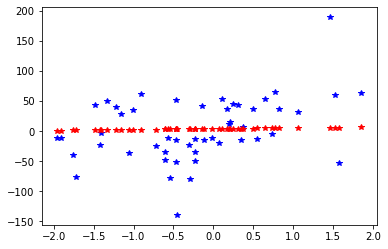

In [4]:
### This code is to explain the idea of regularization, don't run it on your local machine, this will be explained in the session
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline
def get_data(noise = 2):
    X,y,coef = make_regression(n_samples = 50, n_features = 1, noise = noise, random_state=42,coef=True)
    return X,y,coef
def get_model(X,y,lamda = 3):
    reg = Ridge(alpha = lamda)
    mod = reg.fit(X,y)
    theta_1 = mod.coef_
    theta_0 = mod.intercept_
    return theta_0,theta_1
def plot_data(X,y,theta_1,theta_0):
    predictions = theta_0+theta_1*X
    plot = plt.plot(X,y,"*b",X,predictions,"*r")
    return plot
lamda = 600 ## change the value from 5 to 500 and see coefficient estimates
noise = 50
X,y,coef = get_data(noise=noise)
theta_0,theta_1 = get_model(X,y,lamda=lamda)
plot = plot_data(X[:,0],y,theta_1,theta_0)
plot
print(f"Theta_0: {theta_0}, Theta_1: {theta_1}")